In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
sns.set(style="white", context='poster')
from sympy import *
import math
init_printing(use_unicode=True)
from scipy.integrate import solve_ivp

In [2]:
%load_ext autoreload
%autoreload 2


In [3]:
from model_equations_separate_NC_sep_vmax import *

In [4]:
import run_sensitivity

In [5]:

HCOLOR = '#ffc58f'
HCOLOR_light = '#ffd2a9'
PCOLOR = '#99cc99'
PCOLOR_light = '#aad5aa'

DONCOLOR = '#7285b7'
RDONCOLOR = 'black' #'#00334D'
DINCOLOR = '#bbdaff' #'#000066'

DOCCOLOR = '#cc6666'
RDOCCOLOR = 'black' #'#00334D'
DICCOLOR = '#ff9da4' #'#000066'

SHCOLOR = '#ffa98f'
SPCOLOR = '#326232'


ccnpalette = [PCOLOR, HCOLOR, SPCOLOR, SHCOLOR,DONCOLOR, RDONCOLOR, DINCOLOR]
ccnorder = ['Bp', 'Bh', 'Sp', 'Sh', 'DON', 'RDON', 'DIN', ]
cccpalette = [PCOLOR, HCOLOR, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
cccorder = ['Bp[C]', 'Bh[C]', 'Sp[C]', 'Sh[C]', 'DOC', 'RDOC', 'DIC']
ccxpalette = [PCOLOR, HCOLOR]
ccxorder = ['Xp', 'Xh']
hnpalette = [ HCOLOR_light, SPCOLOR, SHCOLOR, DONCOLOR, RDONCOLOR, DINCOLOR]
hnorder = [ 'Bh', 'Sp', 'Sh', 'DON', 'RDON', 'DIN']
hcpalette = [ HCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
hcorder = [ 'Bh[C]', 'Sp[C]', 'Sh[C]', 'DOC', 'RDOC', 'DIC']
pnpalette = [ PCOLOR_light, SPCOLOR, SHCOLOR, DONCOLOR, RDONCOLOR, DINCOLOR]
pnorder = [ 'Bp', 'ABp', 'ABh', 'DON', 'RDON', 'DIN']
pcpalette = [ PCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
pcorder = [ 'Bp[C]', 'Sp[C]', 'Sh[C]', 'DOC', 'RDOC', 'DIC']
sns.color_palette(ccnpalette + cccpalette, )
# 


In [12]:
ref_fpath =  'reference_10cc_axenic.xlsx'
ref_pro99_fpath =  'refence_pro99_axenic.xlsx'
ref_df = pd.read_excel(ref_fpath)
ref_pro99_df = pd.read_excel(ref_pro99_fpath)

In [64]:
model = 'MIN'
organism_to_tune = 'PRO'
param_vals = get_param_vals(model)
params_to_update, bounds, log_params = get_param_tuning_values(model, organism_to_tune)


In [40]:
dpath = r'C:\Users\oweisberg\OneDrive - University of Haifa\Documents\results\recycle_model\res\29062023'
dpath = r'C:\Users\Osnat\OneDrive - University of Haifa\Documents\results\recycle_model\res\29062023'
dpath = 'results'

os.listdir(dpath)

['param_sensitivity_pro99_sum.csv.gz',
 'baseline_29062023_df.csv.gz',
 'least_square_ponly_min_sum.csv.gz',
 'baseline_29062023_mse.csv.gz',
 'param_sensitivity_29062023_mse.csv.gz',
 'param_sensitivity_29062023_sum.csv.gz',
 'param_sensitivity_pro99_mse.csv.gz',
 'least_square_ponly_min_df.csv.gz',
 'param_sensitivity_29062023_df.csv.gz',
 'baseline_29062023_sum.csv.gz',
 'param_sensitivity_pro99_df.csv.gz']

In [41]:
sum_df = pd.read_csv(os.path.join(dpath,'least_square_ponly_min_sum.csv.gz' ))
df =  pd.read_csv(os.path.join(dpath,'least_square_ponly_min_df.csv.gz' ))
#mse_df = pd.read_csv(os.path.join(dpath,'param_sensitivity_29062023_mse.csv.gz' ))

In [42]:
basesum_df = pd.read_csv(os.path.join(dpath,'baseline_29062023_sum.csv.gz' ))
basedf =  pd.read_csv(os.path.join(dpath,'baseline_29062023_df.csv.gz' ))
basemse_df = pd.read_csv(os.path.join(dpath,'baseline_29062023_mse.csv.gz' ))

In [43]:
df['media'] = 'lowN'
df.loc[df.run_id.str.contains('_pro99_'), 'media'] = 'pro99'

In [44]:
df['media'] = 'lowN'
df.loc[df.run_id.str.contains('_pro99_'), 'media'] = 'pro99'

In [45]:
basedf['media'] = 'lowN'
basedf.loc[basedf.run_id.str.contains('_pro99_'), 'media'] = 'pro99'

In [46]:
basedf['media'].value_counts()


lowN     3648
pro99    3588
Name: media, dtype: int64

In [47]:
df.columns

Index(['Unnamed: 0', 'Bp', 'DON', 'RDON', 'DIN', 'DOC', 'RDOC', 'DIC', 'ROS',
       'ABp', 'ABh', 't', 'day', 'Bp[C]', 'ABp[C]', 'ABh[C]', 'run_id',
       'media'],
      dtype='object')

In [48]:
basedf.run_id.unique()

array(['baseline_ponly_pro99_MIXO', 'baseline_ponly_pro99_LEAK',
       'baseline_ponly_pro99_FULL', 'baseline_ponly_FULL',
       'baseline_ponly_LEAK', 'baseline_ponly_MIXO', 'baseline_ponly_MIN',
       'baseline_ponly_pro99_MIN'], dtype=object)

In [49]:
df.min()

Unnamed: 0                                                    0
Bp           -7531737284855995145487252166252113361008629439...
DON          -7026729214511549930619647525174238054922789160...
RDON         -4142961016429329347426215209218535871852911266...
DIN                                                -4733.628431
DOC          -1353832048601246531807265445491829241125613648...
RDOC                                                        0.0
DIC          -2227007638342563871295960558603424424031546598...
ROS          -4987165119748931899717804048660145763268940875...
ABp          -8536197185827097814069890562528121793483394837...
ABh                                                        -0.0
t                                                           0.0
day                                                         0.0
Bp[C]        -5272216099399196863712325148067828953761216354...
ABp[C]       -5975338030078968469848923393769685255438376386...
ABh[C]                                  

In [50]:
basedf.min()

Unnamed: 0                      0
Bp                            0.0
DON                      0.018171
RDON                          0.0
DIN                       0.00376
DOC                         132.5
RDOC                          0.0
DIC                      0.064157
ROS                      0.049402
ABp                           0.0
ABh                           0.0
t                             0.0
day                           0.0
Bp[C]                         0.0
ABp[C]                        0.0
ABh[C]                        0.0
run_id        baseline_ponly_FULL
media                        lowN
dtype: object

In [51]:
df.run_id

0         lsq1_h-3222411177745084387
1         lsq1_h-3222411177745084387
2         lsq1_h-3222411177745084387
3         lsq1_h-3222411177745084387
4         lsq1_h-3222411177745084387
                     ...            
161070     lsq1_h1640785417521028587
161071     lsq1_h1640785417521028587
161072     lsq1_h1640785417521028587
161073     lsq1_h1640785417521028587
161074     lsq1_h1640785417521028587
Name: run_id, Length: 161075, dtype: object

In [75]:
df.melt(id_vars=['run_id', 'media']).groupby(['run_id']).value.min().value_counts()

 0.000000e+00     162
-4.732351e+03       1
-4.032605e+03       1
-4.032340e+03       1
-4.032340e+03       1
-4.032339e+03       1
-4.032339e+03       1
-4.032569e+03       1
-4.032605e+03       1
-4.032339e+03       1
-4.032605e+03       1
-4.032351e+03       1
-4.032339e+03       1
-4.732342e+03       1
-4.732569e+03       1
-4.733628e+03       1
-2.227008e+288      1
-4.032339e+03       1
Name: value, dtype: int64

In [52]:
best_id = 'lsq1_h2782180737887299392'

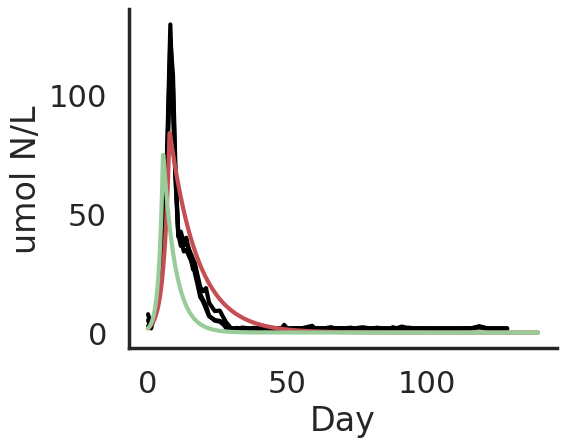

In [59]:
    mdf2 = df.loc[df.media.isin(['lowN']) & df.run_id.isin([best_id])
                 ].melt(id_vars=['run_id', 'day', 't',  ], 
                        value_vars=['Bp'])                            
    mdf2['Day'] =mdf2['day'].round(5)
    #mdf2['param_name'] = '$' + mdf2['sen_param'] + '$'
    #mdf2['param_name'] =  mdf2['sen_param'] 

    #mdf2 = mdf2.loc[~mdf2['run_id'].isin(problematic_run_ids)]


    g = sns.relplot(
        data=mdf2, 
        x='Day', y='value',
        hue='variable', palette=[PCOLOR], #hue_order=ccnorder, palette=ccnpalette,
        estimator=None, units='run_id',
        #col='sen_param', #col_order= paramorder,
        #col_wrap=4,
        kind='line', #lw=1,
        aspect=1.2, legend=False,
    )#.set(ylim=(0,300))

#    for ax in g.axes:
    sns.lineplot(
        data=ref_df,
        x='day', y='ref_Bp',
        estimator=None, units='Sample',
        color='black', #ax=ax
        zorder=0
    )
    sns.lineplot(
        data=basedf.loc[basedf.media.isin(['lowN']) & basedf.run_id.str.contains('MIN')],
        x='day', y='Bp',
        #estimator=None, units='Sample',
        color='r', zorder=1 #ax=ax
    )
        

    #g.map_dataframe(pp)


    g.set(ylabel='umol N/L')
    #g.set_titles(col_template='{col_name}',)
    #plt.suptitle(m, y=1)
    plt.show()

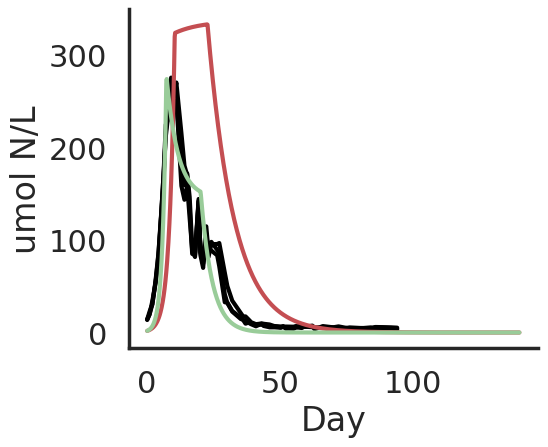

In [61]:
    best_id = 'lsq1_pro99_h2782180737887299392'
    mdf2 = df.loc[df.media.isin(['pro99']) & df.run_id.isin([best_id])
                 ].melt(id_vars=['run_id', 'day', 't',  ], 
                        value_vars=['Bp'])                            
    mdf2['Day'] =mdf2['day'].round(5)
    #mdf2['param_name'] = '$' + mdf2['sen_param'] + '$'
    #mdf2['param_name'] =  mdf2['sen_param'] 

    #mdf2 = mdf2.loc[~mdf2['run_id'].isin(problematic_run_ids)]


    g = sns.relplot(
        data=mdf2, 
        x='Day', y='value',
        hue='variable', palette=[PCOLOR], #hue_order=ccnorder, palette=ccnpalette,
        estimator=None, units='run_id',
        #col='sen_param', #col_order= paramorder,
        #col_wrap=4,
        kind='line', #lw=1,
        aspect=1.2, legend=False,
    )#.set(ylim=(0,300))

#    for ax in g.axes:
    sns.lineplot(
        data=ref_pro99_df,
        x='day', y='ref_Bp',
        estimator=None, units='Sample',
        color='black', #ax=ax
        zorder=0
    )
    sns.lineplot(
        data=basedf.loc[basedf.media.isin(['pro99']) & basedf.run_id.str.contains('MIN')],
        x='day', y='Bp',
        #estimator=None, units='Sample',
        color='r', zorder=1 #ax=ax
    )
        

    #g.map_dataframe(pp)


    g.set(ylabel='umol N/L')
    #g.set_titles(col_template='{col_name}',)
    #plt.suptitle(m, y=1)
    plt.show()

In [76]:
finalX = [-12.82988743,   0.12364383,  -4.16430344,   0.35356596,
        -7.16388029,  -9.30425929]
[np.exp(i) if lg else i for i,lg in zip(finalX, log_params)]

In [77]:
finalX = [-13.10824956,   0.21000957,  -0.35353793,  -3.0947517 ,
       -11.01822921,  -8.14423514]
[np.exp(i) if lg else i for i,lg in zip(finalX, log_params)]

In [ ]:
[-13.10824956,   0.21000957,  -0.35353793,  -3.0947517 ,
       -11.01822921,  -8.14423514]

In [69]:
pd.concat([
    sum_df.loc[sum_df.run_id.isin([best_id]), params_to_update],
    basesum_df.loc[basesum_df.run_id.str.contains('MIN'), params_to_update]])

,Mp,gammaDp,KINp,KICp,VmaxINp,VmaxICp
66,0.000003,0.123644,0.015541,1.424137,0.000774,0.000091
0,0.000001,0.600000,0.142751,0.142751,0.000082,0.000064
1,0.000001,0.600000,0.142751,0.142751,0.000082,0.000064


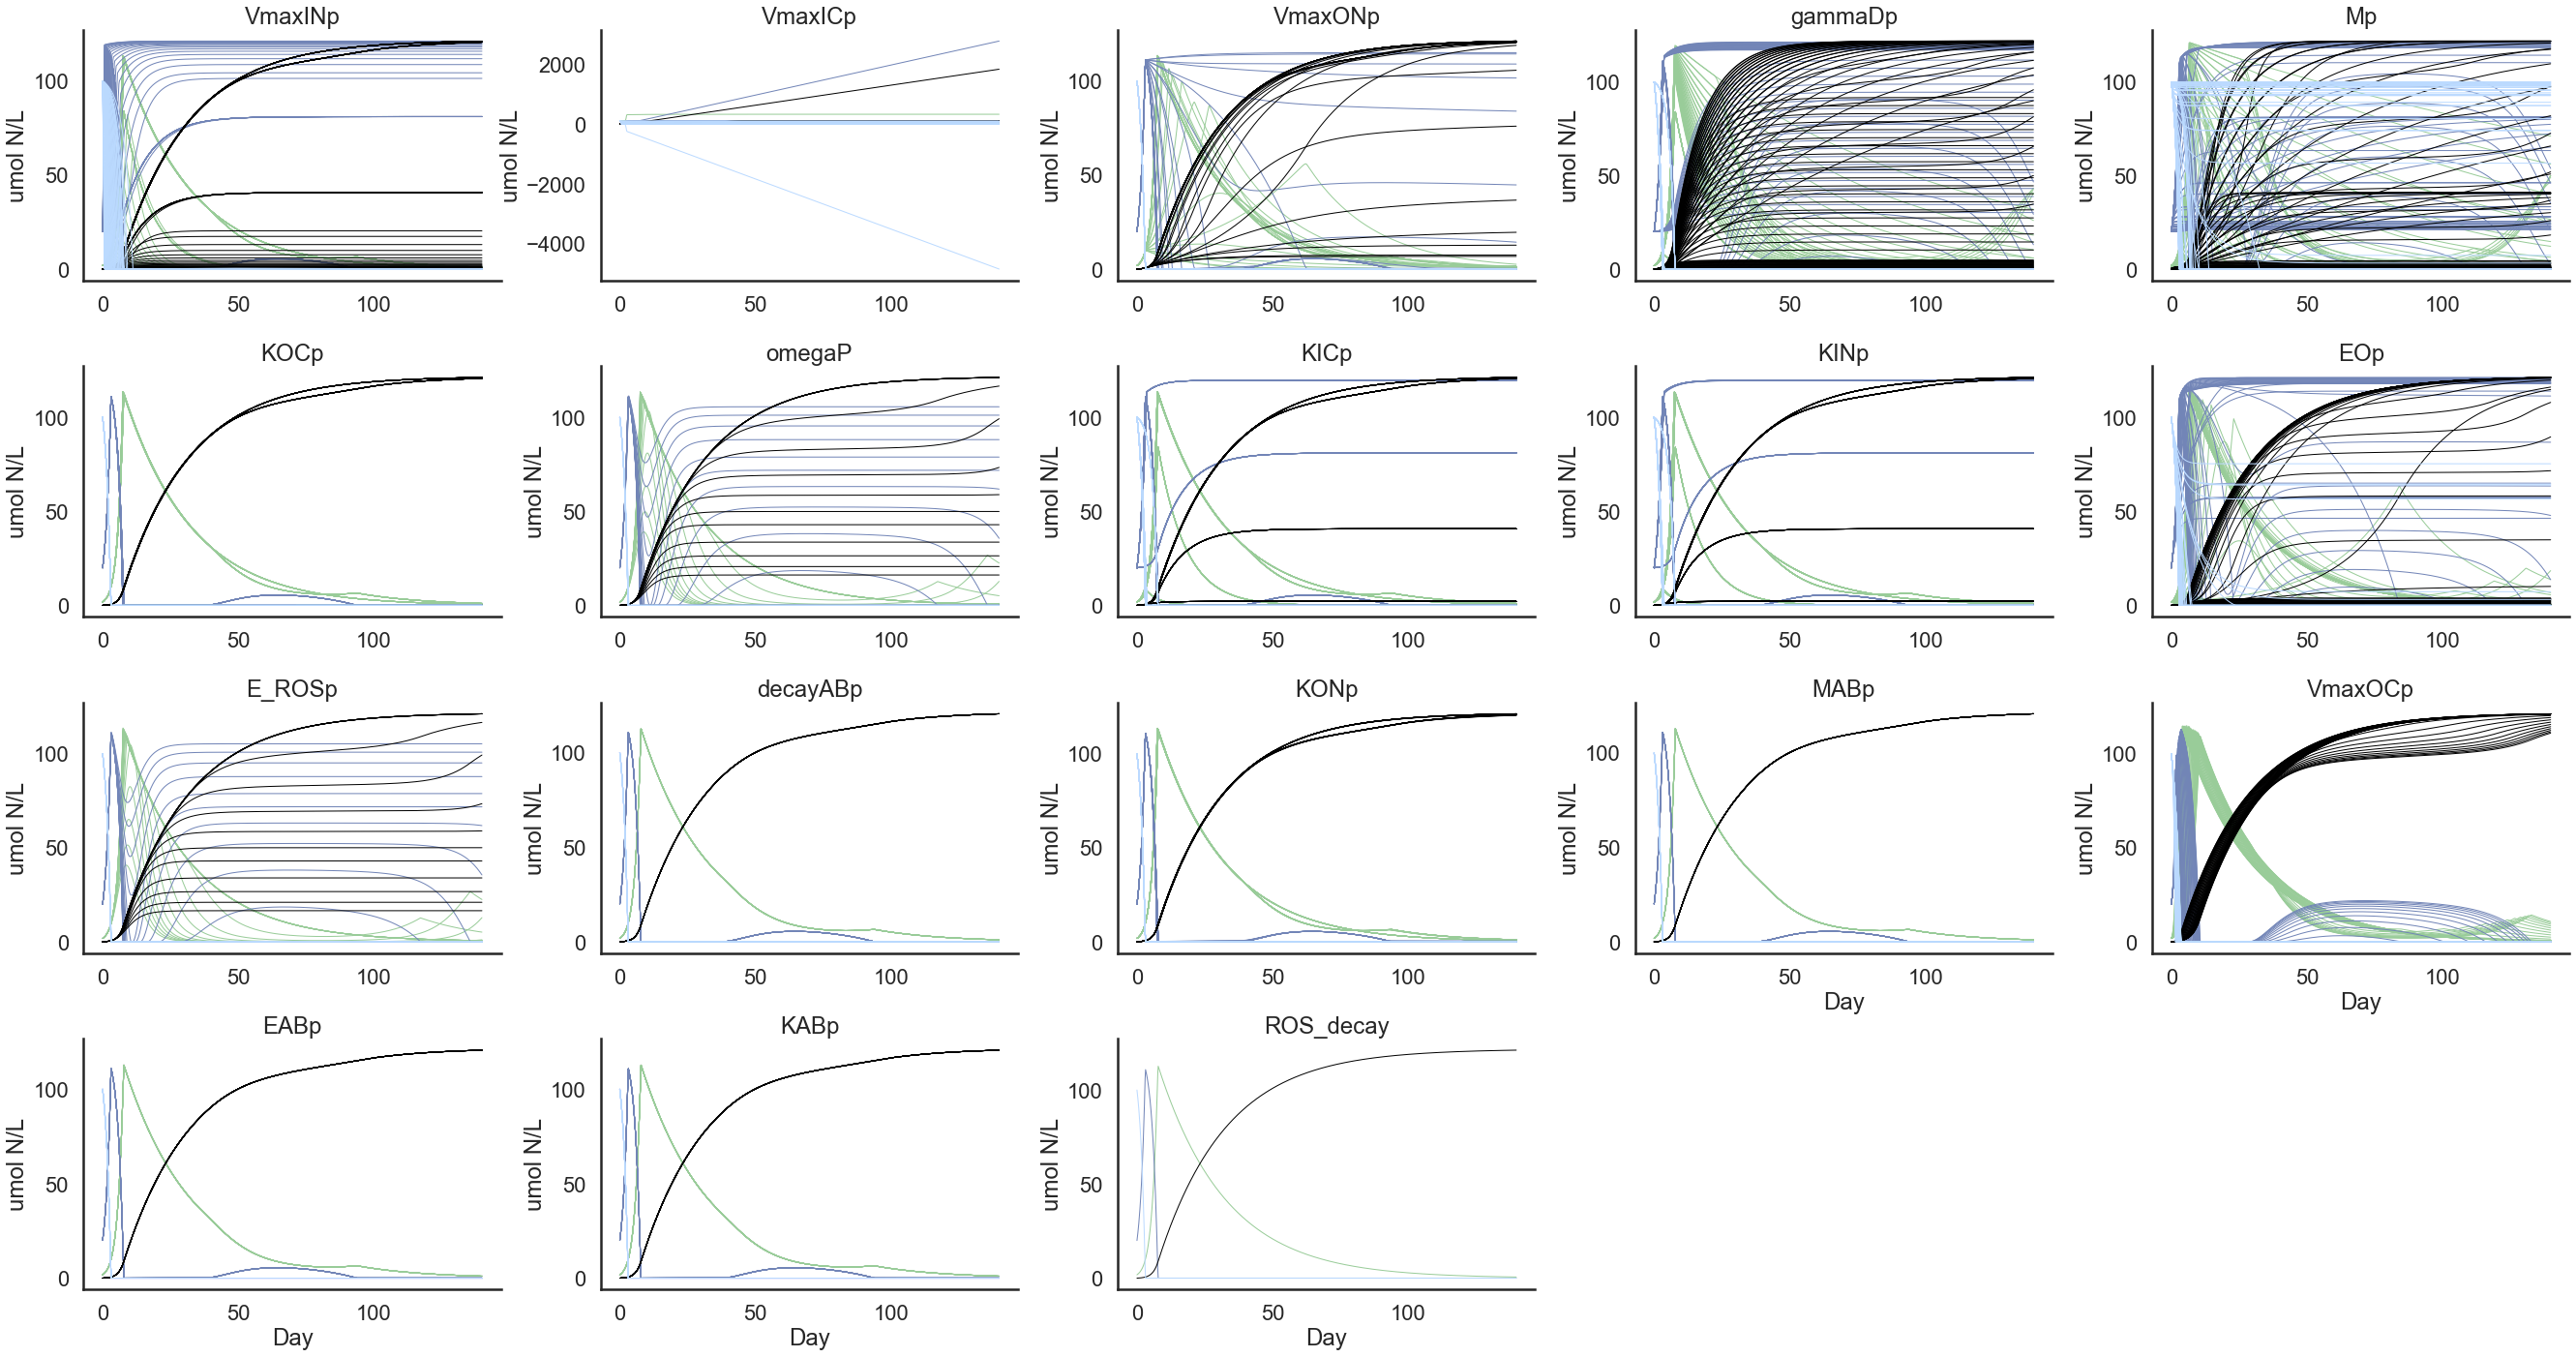

In [44]:
mdf2 = df.melt(id_vars=['run_id', 'day', 't',  ], value_vars=pnorder)                            
mdf2['Day'] =mdf2['day'].round(5)
#mdf2['param_name'] = '$' + mdf2['sen_param'] + '$'
mdf2['param_name'] =  mdf2['sen_param'] 

#mdf2 = mdf2.loc[~mdf2['run_id'].isin(problematic_run_ids)]


g = sns.relplot(
    data=mdf2, 
    x='Day', y='value',
    hue='variable', hue_order=ccnorder, palette=ccnpalette,
    estimator=None, units='run_id',
    col='sen_param', #col_order= paramorder,
    col_wrap=5,
    kind='line', lw=1,
    aspect=1.5, legend=False,
    facet_kws={'sharey': False, 'sharex': False}, #common_bins=False, 
    
)
    


#g.map_dataframe(pp)


g.set(ylabel='umol N/L')
g.set_titles(col_template='{col_name}',)
plt.show()

In [46]:
mse_df.loc[mse_df.model.isin(['MIN'])].drop_duplicates(['run_id']).groupby (['sen_param', 'model'])['idx'].count()

sen_param  model
KICp       MIN      20
KINp       MIN      20
Mp         MIN      21
VmaxICp    MIN      20
VmaxINp    MIN      20
gammaDp    MIN      20
Name: idx, dtype: int64

In [47]:
lowest_ids = mse_df.nsmallest(columns='MSE', n=10)['run_id']

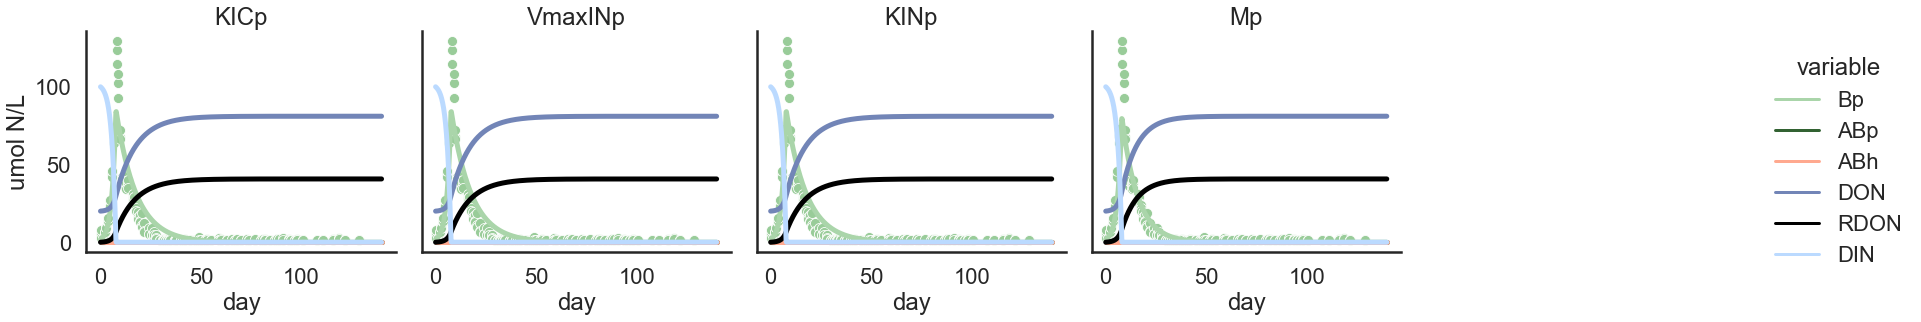

In [48]:
mdf2 = df.melt(id_vars=['run_id', 'day', 't', 'sen_param', 'model', ], value_vars=pnorder)                            
mdf2['Day'] =mdf2['day'].round(5)
#mdf2['param_name'] = '$' + mdf2['sen_param'] + '$'
mdf2['param_name'] =  mdf2['sen_param'] 

g = sns.relplot(
    data=mdf2.loc[mdf2.run_id.isin(lowest_ids)], 
    x='day', y='value',
    hue='variable', hue_order=pnorder, palette=pnpalette,
    #estimator=None, units='run_id',
    col='sen_param', #col_order=lowest_ids, 
    col_wrap=5,
    kind='line', lw=5,
)


def pp(**kwargs):
    
    # get a reference to the currently active axes
    ax = plt.gca()    
    sns.scatterplot(data=refdf.loc[refdf.Group.isin(['Axenic'])], x='day', y='ref_Bp', ax=ax, s=100, legend=False, color=PCOLOR)
    #sns.scatterplot(data=refdf, x='day', y='cc Bh[N]', ax=ax, s=100, legend=False, color=HCOLOR)

g.map(pp)
g.set(ylabel='umol N/L')
g.set_titles(col_template='{col_name}',)



In [49]:
plt.show()

In [50]:
lowest_ids

2316    param_sensitivity_ponly_MIN_Mp_7_h-39004178708...
1227    param_sensitivity_ponly_MIN_KINp_19_h743791071...
1461    param_sensitivity_ponly_MIN_KICp_0_h4644819937...
2334    param_sensitivity_ponly_MIN_VmaxINp_1_h8123056...
1467    param_sensitivity_ponly_MIN_KICp_1_h5779443188...
258     param_sensitivity_ponly_MIN_KICp_2_h7470809639...
687     param_sensitivity_ponly_MIN_KICp_3_h6103158055...
81      param_sensitivity_ponly_MIN_KICp_4_h-428775109...
420     param_sensitivity_ponly_MIN_KINp_18_h-63077074...
303     param_sensitivity_ponly_MIN_KICp_5_h3084452923...
Name: run_id, dtype: object

In [83]:
params_to_update

['Mp', 'gammaDp', 'KINp', 'KICp', 'VmaxINp', 'VmaxICp']

In [79]:
finalX = [-12.82988743,   0.12364383,  -4.16430344,   0.35356596,
        -7.16388029,  -9.30425929]
actual_finalX = [np.exp(i) if lg else i for i,lg in zip(finalX, log_params)]

In [95]:
res_df = pd.DataFrame.from_records(data=[actual_finalX], columns=params_to_update, index=[run_id])
res_df.index.name = "run_id"
res_fpath = os.path.join(out_dpath, f'{run_id}.txt')
res_df.to_csv(res_fpath)

In [93]:
out_dpath = '.'
run_id = 'debug'
with open(os.path.join(out_dpath, f'{run_id}.txt'), 'w') as fh:
    print(run_id, file=fh, end='')
    for i in actual_finalX:
        print(i, file=fh, end='')
    print(run_id, file=fh, end='')
    
    

In [96]:
import run_least_squares_ponly

ModuleNotFoundError: No module named 'run_least_squares_ponly'

In [97]:
Y

NameError: name 'Y' is not defined